In [3]:
import requests
import matplotlib.pyplot as plt

Question 1

In [4]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire'

response = requests.get(endpoint)

response.text

'[{"month_name":"January","year":"2016","query_count":"19","query_text":"fire"}\n,{"month_name":"February","year":"2016","query_count":"35","query_text":"fire"}\n,{"month_name":"March","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"April","year":"2016","query_count":"26","query_text":"fire"}\n,{"month_name":"May","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"June","year":"2016","query_count":"31","query_text":"fire"}\n,{"month_name":"July","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"August","year":"2016","query_count":"47","query_text":"fire"}\n,{"month_name":"September","year":"2016","query_count":"36","query_text":"fire"}\n,{"month_name":"October","year":"2016","query_count":"38","query_text":"fire"}\n,{"month_name":"November","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"December","year":"2016","query_count":"38","query_text":"fire"}]\n'

In [ ]:
res = response.json()
res

In [5]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire&$order=query_count DESC&$limit=1'

response = requests.get(endpoint)

response.text

'[{"month_name":"August","year":"2016","query_count":"47","query_text":"fire"}]\n'

In [6]:
res = response.json()
res

[{'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'}]

Question 2

In [ ]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count >100&$limit=44000'

response = requests.get(endpoint)

response.text

In [ ]:
res1 = response.json()
res1

In [9]:
length = len(res1)
print(length)

1262


Question 3

In [ ]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count >100&query_text=codes'

response = requests.get(endpoint)

response.text

In [ ]:
res2 = response.json()
res2

In [13]:
length = len(res2)
print(length)

56


Question 4

In [14]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

response = requests.get(endpoint)

In [15]:
response

<Response [200]>

In [ ]:
response.text

In [ ]:
res = response.json()
res

In [ ]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=map'

response = requests.get(endpoint)

response.text

In [ ]:
res3 = response.json()
res3

In [20]:
length = len(res3)
print(length)

82


In [21]:
import matplotlib.pyplot as plt
import json
import pandas as pd

In [22]:
df = pd.DataFrame(res3)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   82 non-null     object
 1   year         82 non-null     object
 2   query_count  82 non-null     object
 3   query_text   82 non-null     object
 4   month        26 non-null     object
dtypes: object(5)
memory usage: 3.3+ KB


In [24]:
df.head()

,month_name,year,query_count,query_text,month
0,January,2014,10,map,NaN
1,February,2014,19,map,NaN
2,March,2014,26,map,NaN
3,April,2014,19,map,NaN
4,May,2014,15,map,NaN


In [25]:
df["query_count"] = pd.to_numeric(df["query_count"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   82 non-null     object
 1   year         82 non-null     object
 2   query_count  82 non-null     int64 
 3   query_text   82 non-null     object
 4   month        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.3+ KB


In [27]:
df["year"] = pd.to_numeric(df["year"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   82 non-null     object
 1   year         82 non-null     int64 
 2   query_count  82 non-null     int64 
 3   query_text   82 non-null     object
 4   month        26 non-null     object
dtypes: int64(2), object(3)
memory usage: 3.3+ KB


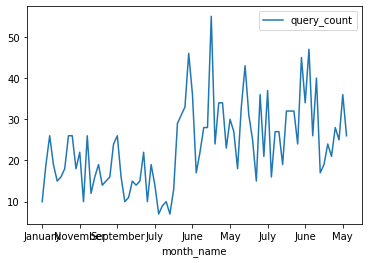

In [29]:
df.plot(x ='month_name', y='query_count');

In [30]:
import seaborn as sns

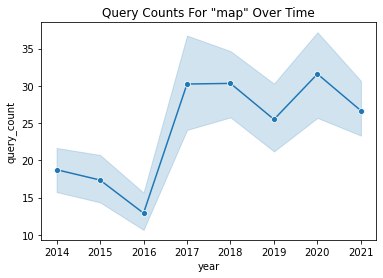

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.lineplot('year','query_count', marker='o',data=df)
plt.title('Query Counts For "map" Over Time')
plt.show();

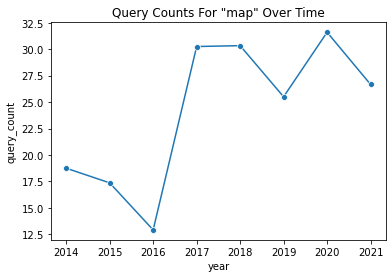

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.lineplot('year','query_count', ci=None, marker='o',data=df)
plt.title('Query Counts For "map" Over Time')
plt.show();